# PCA Analysis For Iris Dataset

https://emanuelfontelles.github.io/blog/Principal-Component-Analysis.html
    
https://www.analyticsvidhya.com/blog/2021/02/diminishing-the-dimensions-with-pca/
    
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
    
https://koho.readthedocs.io/en/latest/auto_examples/plot_decision_tree_classifier_iris.html
    
https://favtutor.com/blogs/decision-boundary-logistic-regression

PCA finds the principal components of data.

It is often useful to measure data in terms of its principal components rather than on a normal x-y axis. So what are principal components then? They’re the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out.

PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle axis occurs first. (more important = more variance/more spread out data)



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.decomposition as pca
from sklearn import datasets

In [3]:
iris =sns.load_dataset("iris")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


## UNIVARIATE EDA

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#LABEL ENCODING
iris.species.replace({'setosa':0, 'versicolor':1, 'virginica':2}, inplace=True)

In [8]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
conda install missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


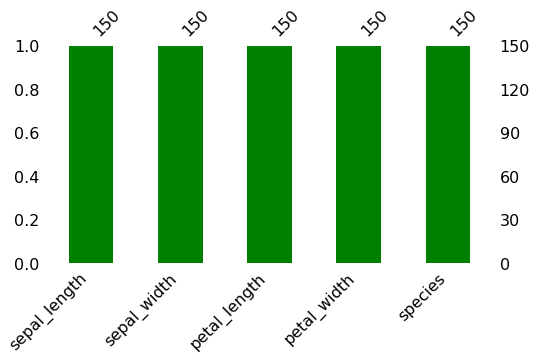

In [10]:
#null count analysis before modelling to keep check
import missingno as msno
m=msno.bar(iris, color='g', figsize=(8,4))

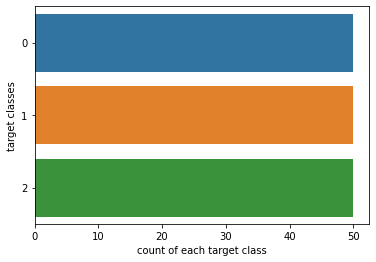

In [11]:
sns.countplot(y=iris.species, data=iris)
plt.xlabel("count of each target class")
plt.ylabel('target classes')
plt.show()

Early Insights :
150 rows

4 Independent variables to act as factors

All have same units of measurement (cm)

No missing data

Three unique target classes namely : 'setosa', 'versicolor' and 'virginica'

No class imbalance, all target classes have equal number of rows (50 each).

## BIVARIATE EDA

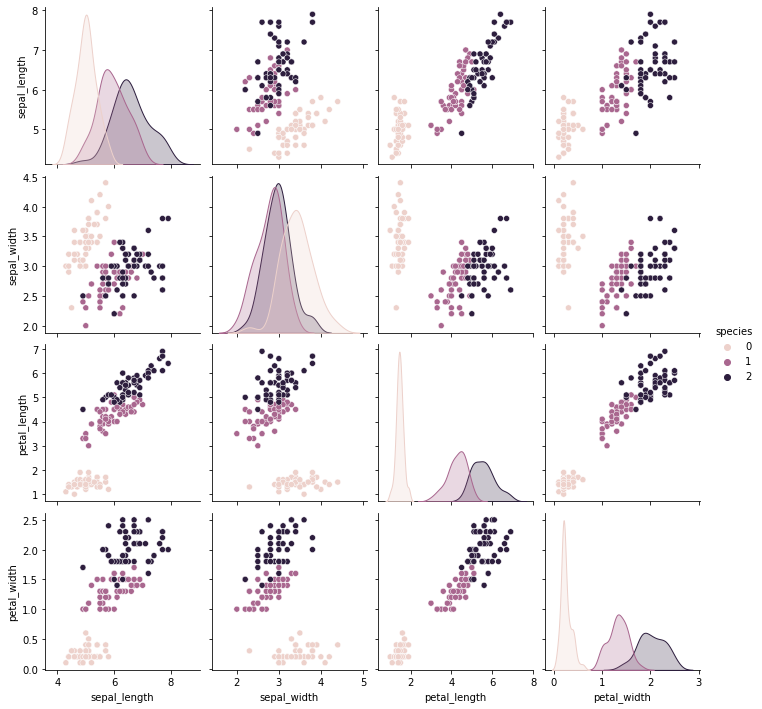

In [12]:
p=sns.pairplot(data=iris, hue='species')

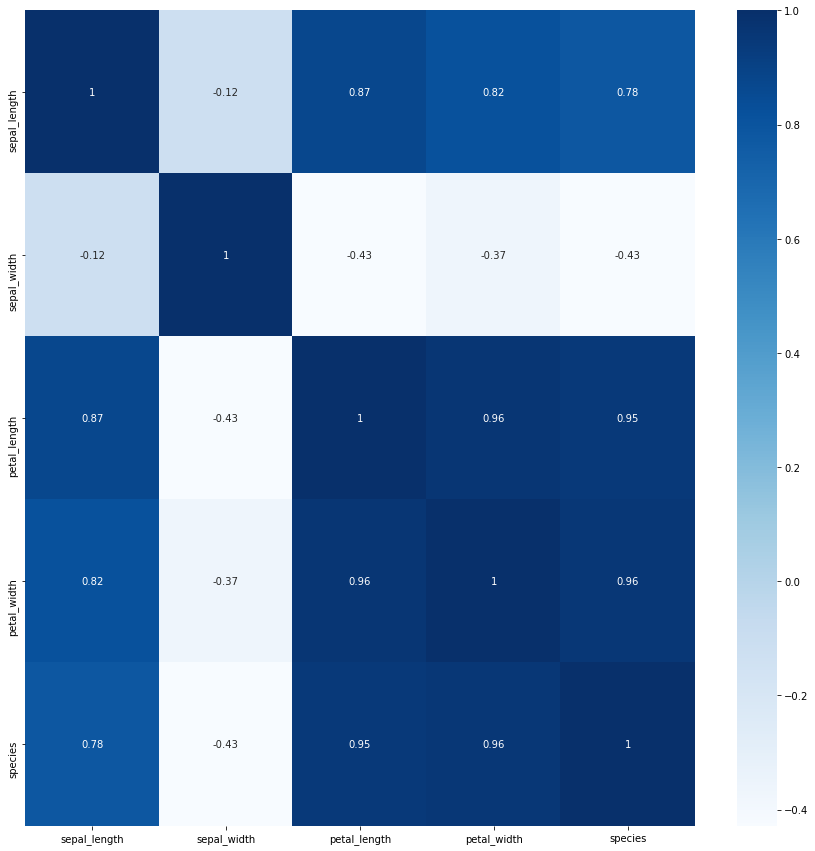

In [64]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris.corr(),annot=True,cmap='Blues')


It can be observed that:
    
Petal width and petal length have high correlations. 

Petal length and petal width have good correlations.

Petal Width and Sepal length have good correlations.


One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features.

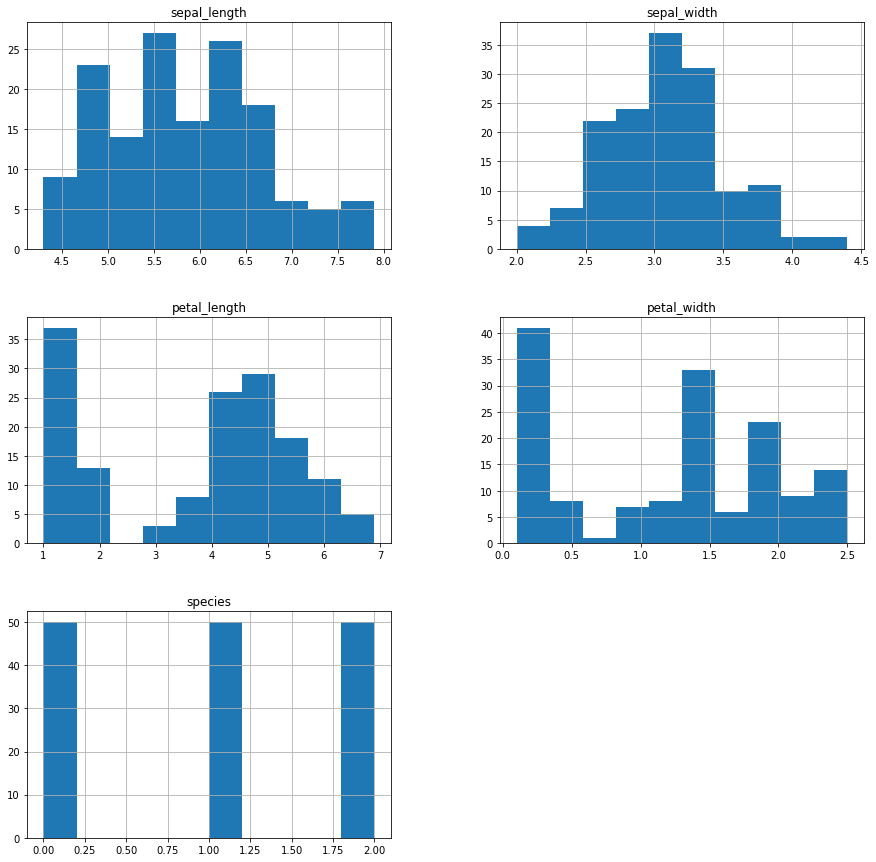

In [14]:
iris.hist(figsize=(15,15),bins=10)
plt.show()

The histogram distributions don't seem to be ideal.

## Modelling-Without PCA

In [65]:
#separating feature and target variables
X=iris.drop(['species'], axis=1)
y=iris.species

target=pd.DataFrame(y)
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Now we will scale the data because if not PCA will not be able to find the optimal Principal Components. For eg. we have a feature in ‘meters’ and another in ‘kilometers’, the feature with unit ‘meter’ will have more variance than ‘kilometers’ (1 km = 1000 m), so PCA will give more importance to the feature with high variance

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)
#MAKING DATA FRAME FOR BETTER UNDERSTANDING
df_scaled=pd.DataFrame(X)
df_scaled

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#splitting data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)
#(stratify=y) This will be used by the train_test_split() function to ensure that both the train and test sets have 
#the proportion of examples in each class that is present in the provided “y” array

In [68]:
knn=KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(y_pred)

[1 2 2 1 0 0 2 2 2 0 1 2 1 2 1 2 0 0 0 2 2 1 0 0 0 1 0 2 2 2 0 0 1 0 1 1 2
 1 2 0 1 1 1 0 1]


In [69]:
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9619047619047619 %
Test score before PCA 0.9555555555555556 %


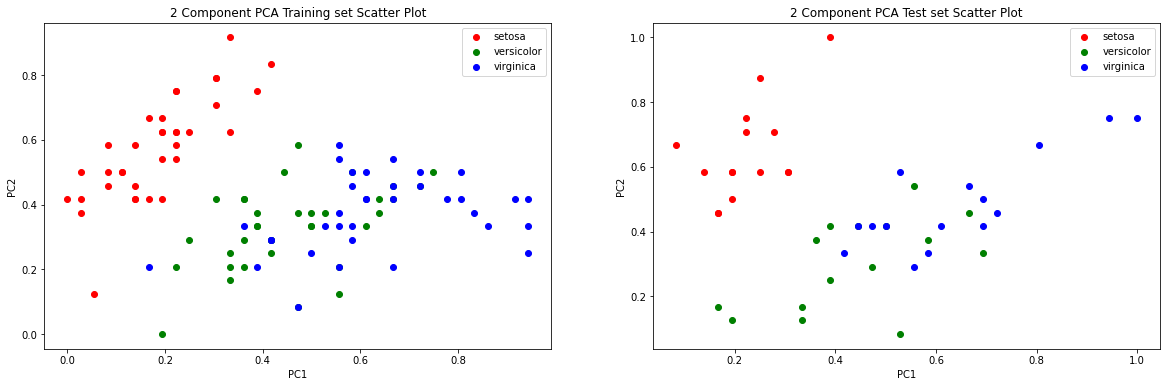

In [70]:
# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_train[y_train==i,0], X_train[y_train==i,1], c=c, label=target_name)   
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Training set Scatter Plot')



plt.subplot(1, 2, 2)
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_test[y_test==i,0], X_test[y_test==i,1], c=c, label=target_name)
plt.legend() 


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Test set Scatter Plot')
plt.show()

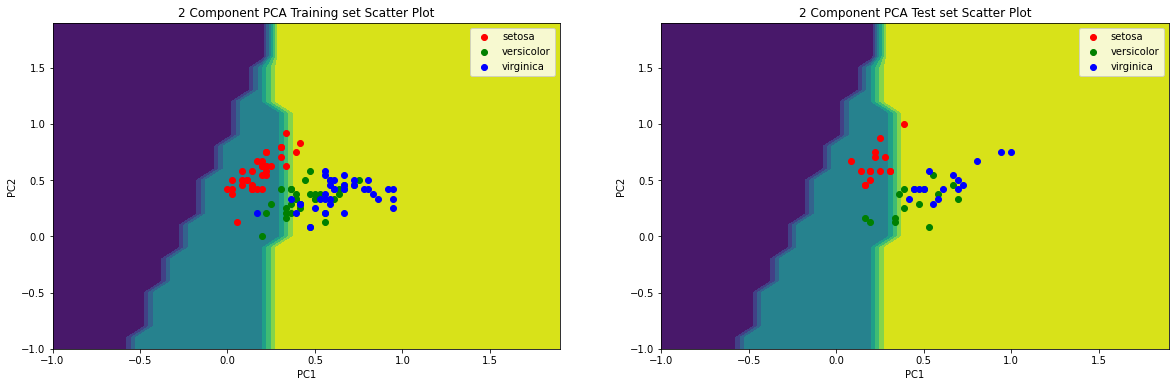

In [71]:
import numpy as np
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = knn_pca.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = knn_pca.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)


plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_train[y_train==i,0], X_train[y_train==i,1], c=c, label=target_name)   
plt.legend()


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Training set Scatter Plot')



plt.subplot(1, 2, 2)
plt.contourf(xx_train, yy_train, Z_train)
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_test[y_test==i,0], X_test[y_test==i,1], c=c, label=target_name)
plt.legend() 


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Test set Scatter Plot')
plt.show()

## Modelling- With PCA

In [20]:
from sklearn.decomposition import PCA
pca=PCA()
X_new=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(X_new)
df_pca

,0,1,2,3
0,-0.630703,0.107578,-0.018719,-0.007307
1,-0.622905,-0.104260,-0.049142,-0.032359
2,-0.669520,-0.051417,0.019644,-0.007434
3,-0.654153,-0.102885,0.023219,0.020114
4,-0.648788,0.133488,0.015116,0.011786
...,...,...,...,...
145,0.551462,0.059841,0.086283,-0.110092
146,0.407146,-0.171821,-0.004102,-0.065241
147,0.447143,0.037560,0.049546,-0.032743
148,0.488208,0.149678,0.239209,0.002864


In [21]:
pca.get_covariance()

array([[ 0.05290845, -0.00491134,  0.05999602,  0.05975355],
       [-0.00491134,  0.03298254, -0.02328082, -0.02111795],
       [ 0.05999602, -0.02328082,  0.08952249,  0.09149784],
       [ 0.05975355, -0.02111795,  0.09149784,  0.10086914]])

In [22]:
EXR=pca.explained_variance_ratio_
EXR

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

Text(0, 0.5, 'Explained Varience')

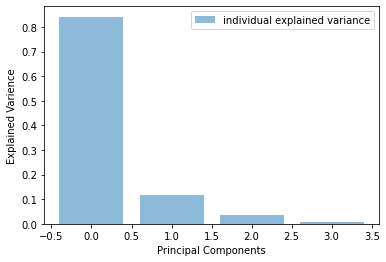

In [23]:
plt.bar(range(4),EXR, label='individual explained variance', alpha=0.5, align='center')
plt.legend(loc='best')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

###### The first 2 Principal Components are capturing around 94% of the variance so we can replace the 4 original features (sepal_length,sepal_width,petal_length,petal_width) with the new 2 features having 94% of the information. So, we have reduced the 4 dimensions to only 2 dimensions while retaining most of the information

In [24]:
pca=PCA(n_components=3)   #first 3 PC capturing most of the information
X_new=pca.fit_transform(df_scaled)

In [25]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [26]:
#applying classifier with PC to train dataset
knn_pca = KNeighborsClassifier(5)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9904761904761905 %
Test score after PCA 0.9777777777777777 %


In [27]:
#if we take first 2 components then
pca=PCA(n_components=2)   
X_new=pca.fit_transform(df_scaled)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

#applying classifier with PC to train dataset
knn_pca = KNeighborsClassifier(5)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")


Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9111111111111111 %


In [28]:
finalDf=pd.DataFrame(X_new)
finalDf

,0,1
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488
...,...,...
145,0.551462,0.059841
146,0.407146,-0.171821
147,0.447143,0.037560
148,0.488208,0.149678


In [29]:
finalDf = pd.concat([finalDf, target], axis = 1)
finalDf.head(5)

,0,1,species
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0
3,-0.654153,-0.102885,0
4,-0.648788,0.133488,0


In [34]:
target_names = ['setosa', 'versicolor', 'virginica']

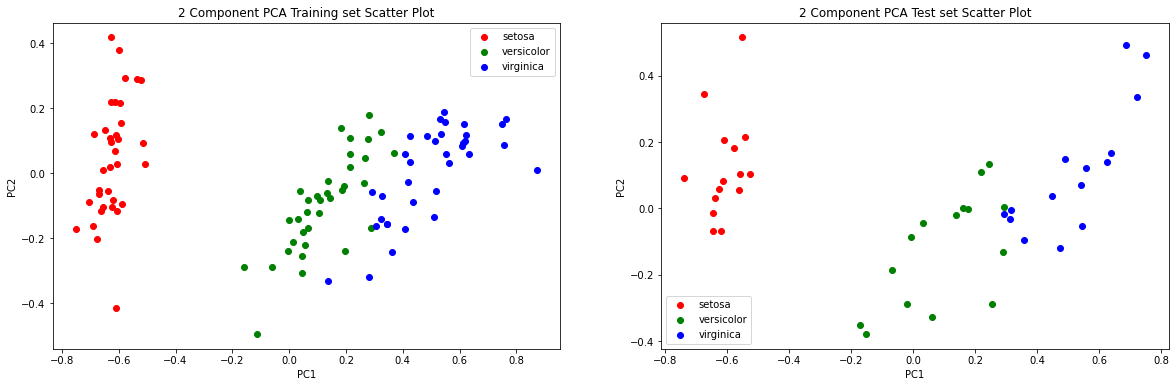

In [49]:
# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_train_new[y_train==i,0], X_train_new[y_train==i,1], c=c, label=target_name)   
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Training set Scatter Plot')



plt.subplot(1, 2, 2)
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_test_new[y_test==i,0], X_test_new[y_test==i,1], c=c, label=target_name)
plt.legend() 


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Test set Scatter Plot')
plt.show()

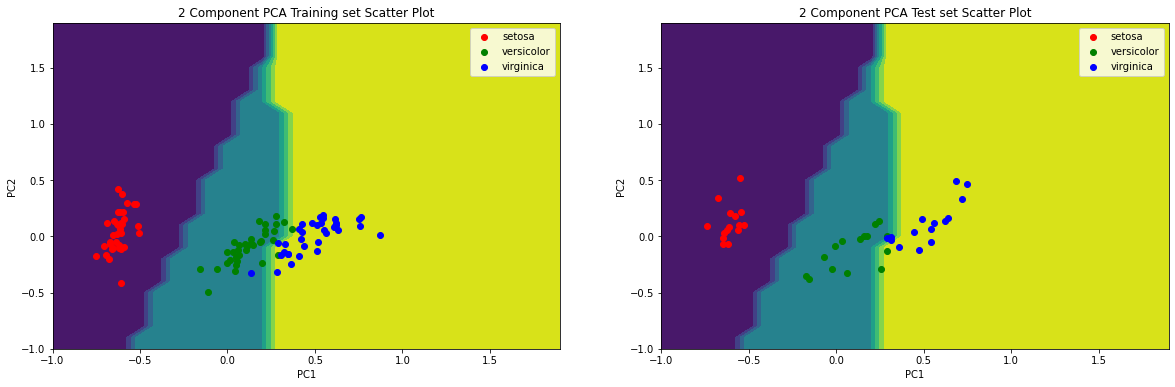

In [63]:
import numpy as np
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = knn_pca.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = knn_pca.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)


plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_train_new[y_train==i,0], X_train_new[y_train==i,1], c=c, label=target_name)   
plt.legend()


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Training set Scatter Plot')



plt.subplot(1, 2, 2)
plt.contourf(xx_train, yy_train, Z_train)
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_test_new[y_test==i,0], X_test_new[y_test==i,1], c=c, label=target_name)
plt.legend() 


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2 Component PCA Test set Scatter Plot')
plt.show()

###### We can observe the plots before pca and after pca and conclude that the decision boundary between the species after applying pca is very clear.

Thus, we did Dimensionality Reduction for following reasons :

Dimensionality Reduction helps in data compression, and hence reduced storage space.

It reduces computation time.

It also helps remove redundant features, if any.

Removes Correlated Features.

Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly.

It is helpful in noise removal also and as a result of that, we can improve the performance of models.